# Image Scaling

Image scaling is a very interesting problem. How do you capture an image's defining features when you have less surface area to work with? Especially when defining features may be different depending on what the image is portraying. Sometimes if the shape and color is preserved, it can be enough. But for an fashion marketplace like Depop, preserving patterns and textures can be incredibly important. 

I was browsing through the app on my journey into sustainable fashion, when I came across these incredibly cute pants. I noticed that on the minimized image on the seller's profile, the image looked very odd, shown below. 

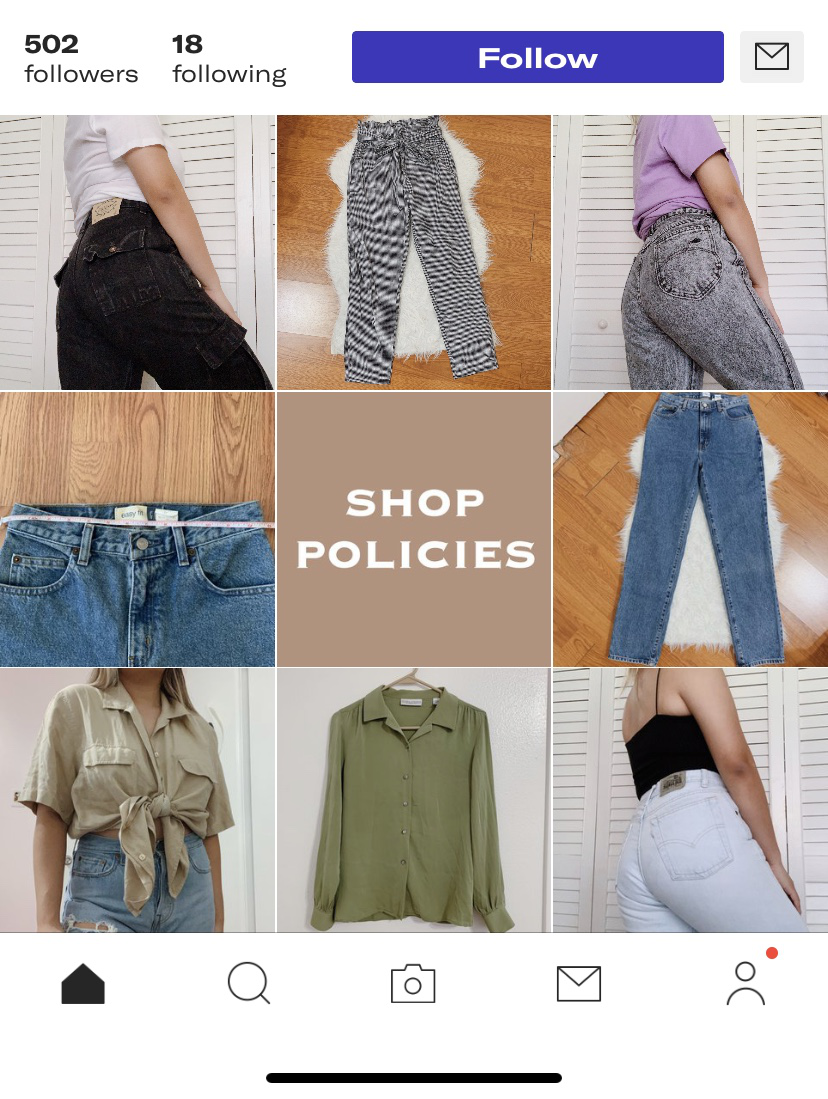

In [1]:
from PIL import Image
profile_view = Image.open("profile_view.jpg");
display(profile_view)

However, I clicked her profile and saw the full image, which looked like this. 

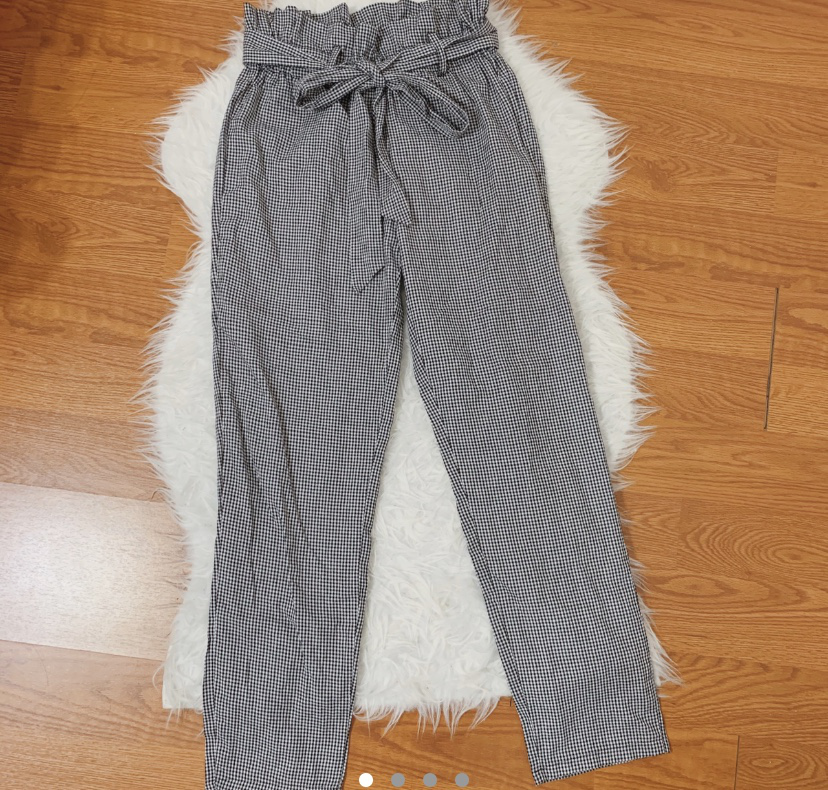

In [2]:
myImage = Image.open("checkered_pants.jpg");
display(myImage)

I'd definitely wear those! I then wondered what image rescaling algorithm Depop is using to shrink their images. So I decided to resize these images and see what they looked like using other tools. I opened the image in Apple Preview and downscaled it and it actually looked pretty good compared to what I saw in Depop and opening it in Pillow using the Bicubic algorithm.

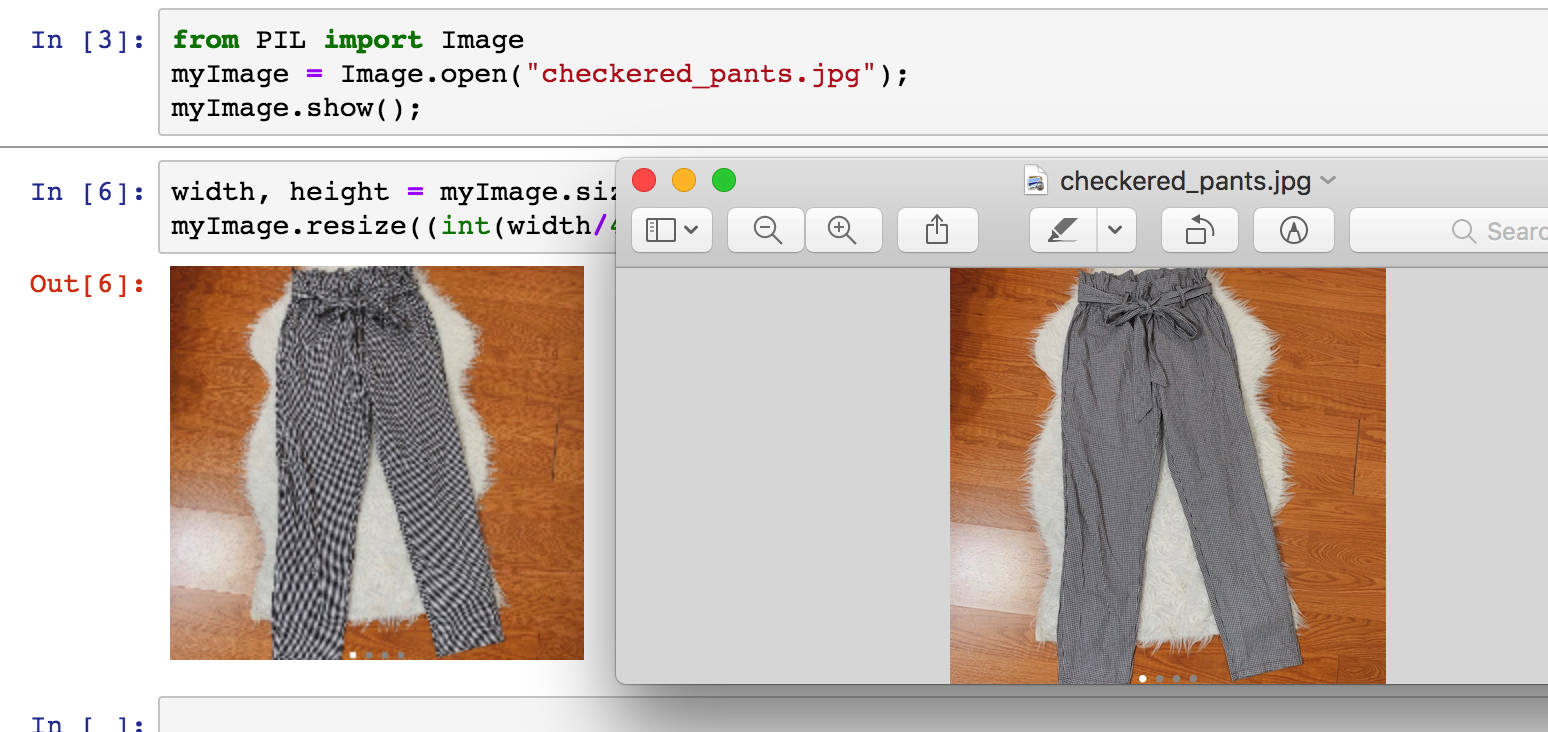

In [3]:
preview_comparison = Image.open("preview_comparison.jpg");
display(preview_comparison)

Then I became even more curious. What algorithm is Apple using for these pants to look so good even though they're so small! I don't have the answer to that... so I just decided to check out all the [filters](https://pillow.readthedocs.io/en/stable/handbook/concepts.html#concept-filters) the Python Imaging Library Pillow offers for Image Resizing.

In [4]:
width, height = myImage.size 
w = int(width/4)
h = int(height/4)

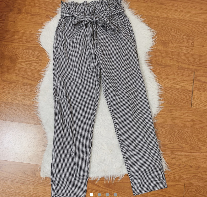

In [5]:
# PIL.Image.NEAREST
myImage.resize(size=(w, h), resample=0, box = None)

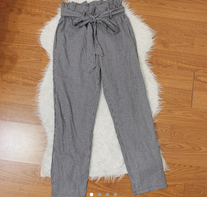

In [6]:
# PIL.Image.BOX
myImage.resize(size=(w, h), resample=1, box = None)

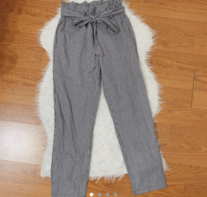

In [7]:
# PIL.Image.BILINEAR
myImage.resize(size=(w, h), resample=2, box = None)

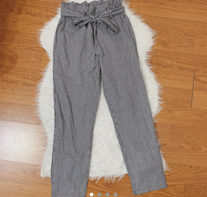

In [8]:
# PIL.Image.HAMMING
myImage.resize(size=(w, h), resample=3, box = None)

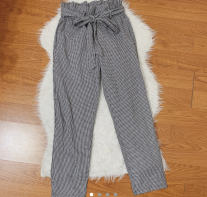

In [9]:
#PIL.Image.BICUBIC (Default)
myImage.resize(size=(w, h), resample=4, box = None)

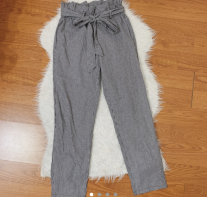

In [10]:
# PIL.Image.LANCZOS
myImage.resize(size=(w, h), resample=5, box = None)

Trying out all these different sampling methods, it seems like Lanzcos seems to best preserve this image while not introducing a new pattern to the pants that doesn't already exist (like in the first example with the Nearest neighbor interpolation). However, it seems there isn't an objective best algorithm for image rescaling, and perhaps should be determined based on what we know about the image. If the description includes keywords about pattern/texture, it may be worth it to use an algorithm that preserves that (for example, this post included the word "gingham"). Regardless, this was a fun little tangent shopping at Depop has brought me to. :) 